In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.spatial import distance

In [4]:
data = pd.read_csv('/Users/solimlegris/Documents/McGill/Winter 2021/COGS444/data.csv', index_col=0)
data

,sim_run,cat_code,k,d,pd,pdi,init_loss_AE,min_loss_AE,avg_loss_diff_AE,init_loss_cl,...,w_B_bef,bt_bef,w_A_af,w_B_af,bt_af,global_CP,avg_dist_w_A,avg_dist_w_B,avg_dist_w,avg_dist_bt
0,1,01-02-01-00-5,1,2,1,0.0,0.119553,0.003961,0.008257,0.100299,...,0.060391,0.060244,0.156326,0.034205,0.028407,0.124209,-0.026186,-0.031837,-0.029011,0.095198
1,2,01-02-01-01-5,1,2,1,0.1,0.129333,0.004072,0.008947,0.137424,...,0.061812,0.061176,0.143888,0.040072,0.035492,0.105185,-0.021741,-0.025685,-0.023713,0.081473
2,3,01-02-01-02-4,1,2,1,0.2,0.136590,0.003778,0.009487,0.099079,...,0.063358,0.063174,0.148365,0.039013,0.040108,0.107788,-0.024345,-0.023066,-0.023705,0.084082
3,4,01-02-01-04-9,1,2,1,0.4,0.140001,0.003791,0.009729,0.127529,...,0.062551,0.063078,0.129240,0.041307,0.042273,0.086730,-0.021243,-0.020805,-0.021024,0.065706
4,5,01-04-01-00-1,1,4,1,0.0,0.141343,0.003799,0.009825,0.110689,...,0.061660,0.061689,0.133407,0.016821,0.016863,0.116009,-0.044838,-0.044826,-0.044832,0.071177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4363,4364,12-28-11-04-0,12,28,11,0.4,0.129719,0.015644,0.008148,0.248118,...,0.069344,0.069272,0.061863,0.037147,0.040492,0.022873,-0.032196,-0.028780,-0.030488,-0.007615
4364,4365,12-28-12-00-0,12,28,12,0.0,0.135696,0.003951,0.009410,0.201610,...,0.069958,0.069609,0.088587,0.023724,0.022833,0.064926,-0.046234,-0.046776,-0.046505,0.018421
4365,4366,12-28-12-01-0,12,28,12,0.1,0.139826,0.005293,0.009609,0.165267,...,0.070499,0.070664,0.112111,0.035030,0.032743,0.077563,-0.035469,-0.037921,-0.036695,0.040868
4366,4367,12-28-12-02-0,12,28,12,0.2,0.140368,0.004145,0.009730,0.265140,...,0.070715,0.070353,0.067208,0.066131,0.068037,0.000097,-0.004584,-0.002316,-0.003450,-0.003353


In [10]:
no_noise = data[data['pdi'] == 0.0]
no_noise = no_noise[['sim_run', 'cat_code', 'k', 'd', 'pd', 'pdi', 'min_loss_AE', 'min_loss_cl', 'max_acc', 'global_CP']]
no_noise

,sim_run,cat_code,k,d,pd,pdi,min_loss_AE,min_loss_cl,max_acc,global_CP
0,1,01-02-01-00-5,1,2,1,0.0,0.003961,0.025632,98.780488,0.124209
4,5,01-04-01-00-1,1,4,1,0.0,0.003799,0.020399,98.292683,0.116009
8,9,01-06-01-00-5,1,6,1,0.0,0.003905,0.031309,97.804878,0.115722
12,13,01-08-01-00-0,1,8,1,0.0,0.004004,0.032074,96.829268,0.116917
16,17,01-10-01-00-2,1,10,1,0.0,0.003885,0.030159,97.682927,0.102440
...,...,...,...,...,...,...,...,...,...,...
4348,4349,12-28-08-00-1,12,28,8,0.0,0.005042,0.046933,97.682927,0.035932
4352,4353,12-28-09-00-0,12,28,9,0.0,0.043945,0.126526,87.926829,0.028044
4356,4357,12-28-10-00-1,12,28,10,0.0,0.003791,0.065546,94.634146,0.036456
4360,4361,12-28-11-00-1,12,28,11,0.0,0.003751,0.041824,97.804878,0.037932


In [17]:
no_noise[no_noise['min_loss_cl'] > 0.10]

,sim_run,cat_code,k,d,pd,pdi,min_loss_AE,min_loss_cl,max_acc,global_CP
716,717,05-16-05-00-2,5,16,5,0.0,0.003820,0.111988,89.634146,0.023555
856,857,06-02-05-00-0,6,2,5,0.0,0.004402,0.102103,87.804878,0.037123
904,905,06-06-05-00-0,6,6,5,0.0,0.003835,0.113046,86.951220,0.025999
928,929,06-08-05-00-2,6,8,5,0.0,0.004282,0.101941,88.292683,0.035324
1000,1001,06-14-05-00-3,6,14,5,0.0,0.004076,0.112068,85.975610,0.031810
...,...,...,...,...,...,...,...,...,...,...
4212,4213,12-22-10-00-0,12,22,10,0.0,0.003774,0.247316,56.951220,0.018992
4260,4261,12-24-10-00-1,12,24,10,0.0,0.003969,0.144158,82.439024,0.021727
4300,4301,12-26-08-00-0,12,26,8,0.0,0.003795,0.246307,56.707317,0.008301
4308,4309,12-26-10-00-0,12,26,10,0.0,0.003921,0.121559,86.829268,0.029102


In [21]:
no_noise[no_noise['min_loss_AE'] > 0.14]

,sim_run,cat_code,k,d,pd,pdi,min_loss_AE,min_loss_cl,max_acc,global_CP
1140,1141,06-26-04-00-2,6,26,4,0.0,0.141455,0.061110,95.853659,0.034900
2556,2557,10-02-10-00-1,10,2,10,0.0,0.149213,0.118007,84.146341,0.032206


In [ ]:
no_noise.plot('global_CP', 'min_loss_cl', 'scatter')
plt.show()

In [ ]:
# Define a function that computes within-category distances and between category distances

In [2]:
def generate_point(mean_x, mean_y, mean_z, deviation_x, deviation_y, deviation_z, size):
    rng = np.random.default_rng()
    x = rng.normal(mean_x, deviation_x, size)
    y = rng.normal(mean_y, deviation_y, size)
    z = rng.normal(mean_z, deviation_z, size)
    return np.array([x, y, z])

In [3]:
def compute_distance(catA, catB):

    withinA = distance.cdist(catA, catA)
    withinB = distance.cdist(catB, catB)
    between = distance.cdist(catA, catB)

    return np.mean(withinA), np.mean(withinB), np.mean(between)

In [4]:
def save(catA, catB, setnum):
    catA = catA.T
    catB = catB.T
    withinA, withinB, between = compute_distance(catA, catA)
    info=[withinA, withinB, between]
    path = os.path.join('..', 'data', 'continuous', 'exp3', 'categories', 'set_'+str(setnum), 'set_'+str(setnum))
    np.savez_compressed(path, a=catA, b=catB, info=info)

# Varying between-category distance

(3, 1000)


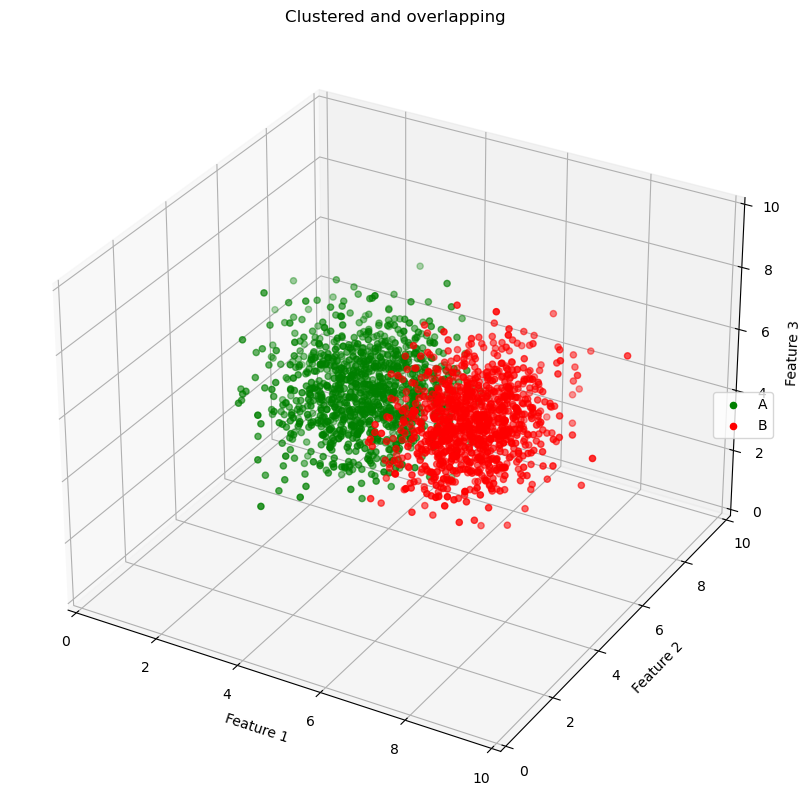

In [171]:
cat1_0 = generate_point(4,5,5,1,1,1,1000) 
cat2_0 = generate_point(6, 5, 5, 1, 1, 1, 1000)
print(cat1_0.shape)
# Remove some overlap ...
for i, x in enumerate(cat1_0[0]):
    if x >= 6:
        cat1_0[0][i] = np.random.uniform(3, 5)
for i, x in enumerate(cat2_0[0]):
    if x <= 6:
        cat2_0[0][i] = np.random.uniform(5, 8)

# Save dataset
save(cat1_0, cat2_0, 0)

# Figure
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter3D(cat1_0[0], cat1_0[1], cat1_0[2], color='green', label='A')
ax.scatter3D(cat2_0[0], cat2_0[1], cat2_0[2], color='red', label='B')
ax.legend(loc='right')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_zlim(0, 10)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('Clustered and overlapping')
plt.show()

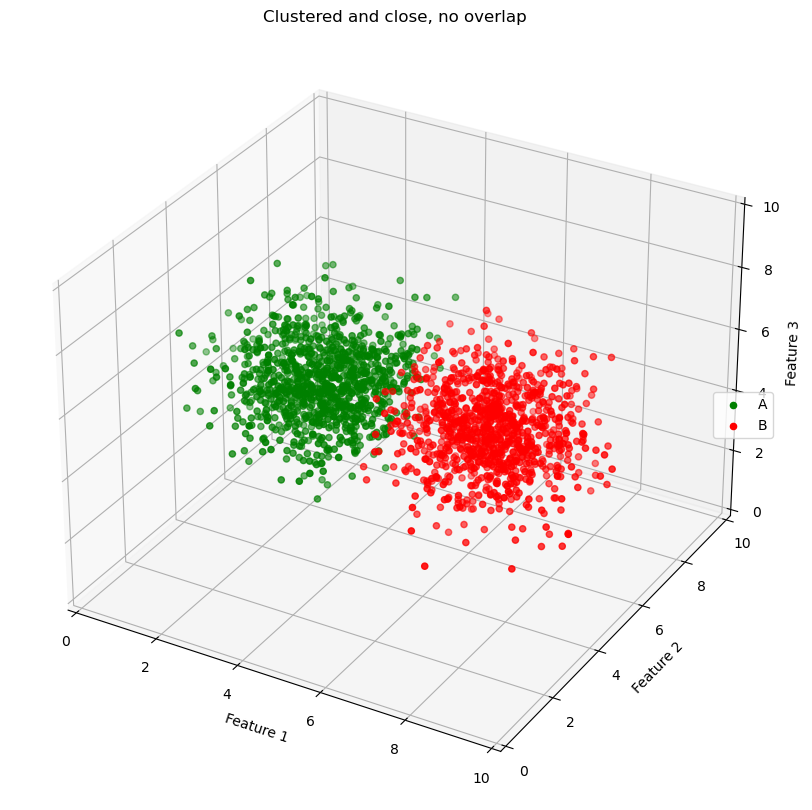

In [172]:
cat1_1 = generate_point(3,5,5,1,1,1,1000) 
cat2_1 = generate_point(7, 5, 5, 1, 1, 1, 1000)

# Remove overlap 
for i, x in enumerate(cat1_1[0]):
    if x >= 5:
        cat1_1[0][i] = np.random.uniform(0, 5)
for i, x in enumerate(cat2_1[0]):
    if x <= 5:
        cat2_1[0][i] = np.random.uniform(5, 10)


# Save dataset
save(cat1_1, cat2_1, 1)

# Figure
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter3D(cat1_1[0], cat1_1[1], cat1_1[2], color='green', label='A')
ax.scatter3D(cat2_1[0], cat2_1[1], cat2_1[2], color='red', label='B')
ax.legend(loc='right')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_zlim(0, 10)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('Clustered and close, no overlap')
plt.show()

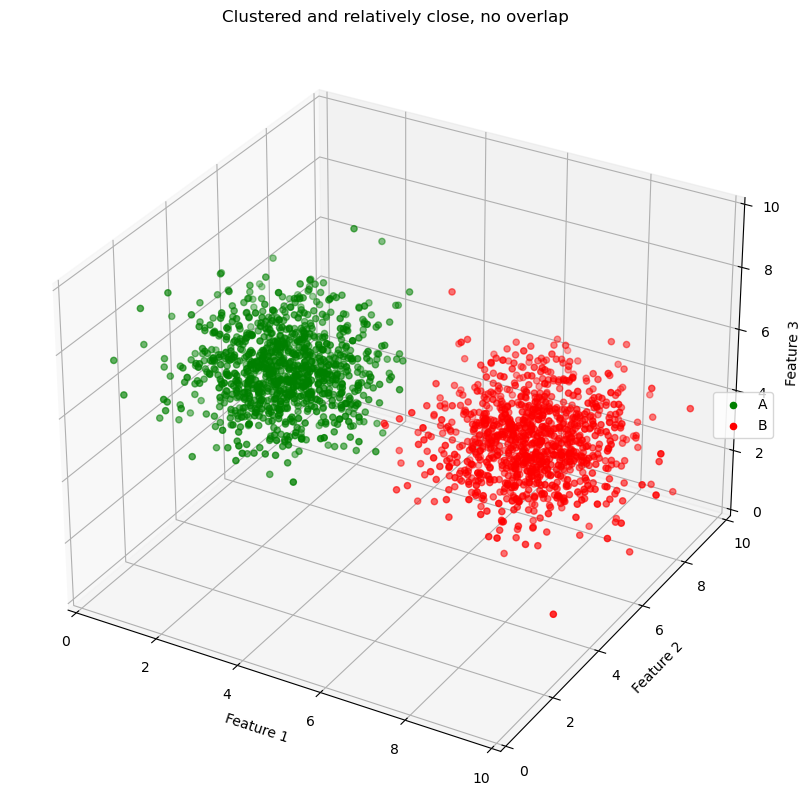

In [173]:
cat1_2 = generate_point(2,5,5,1,1,1,1000) 
cat2_2 = generate_point(8, 5, 5, 1, 1, 1, 1000)

# Remove overlap 
for i, x in enumerate(cat1_2[0]):
    if x >= 5:
        cat1_2[0][i] = np.random.uniform(0, 5)
for i, x in enumerate(cat2_2[0]):
    if x <= 5:
        cat2_2[0][i] = np.random.uniform(5, 10)
        
# Save dataset
save(cat1_2, cat2_2, 2)

# Figure
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter3D(cat1_2[0], cat1_2[1], cat1_2[2], color='green', label='A')
ax.scatter3D(cat2_2[0], cat2_2[1], cat2_2[2], color='red', label='B')
ax.legend(loc='right')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_zlim(0, 10)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('Clustered and relatively close, no overlap')
plt.show()

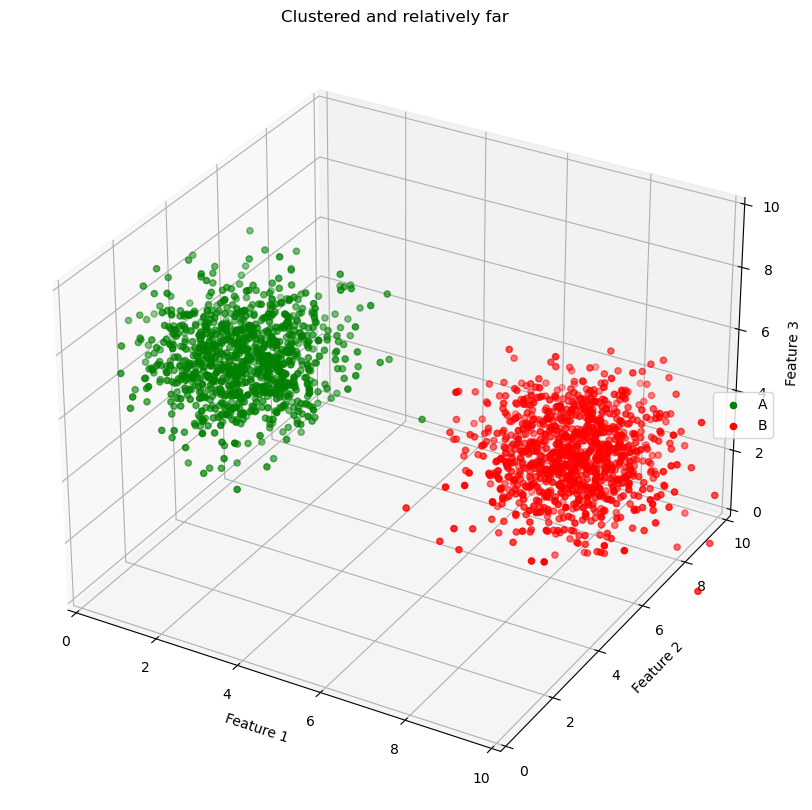

In [174]:
cat1_3 = generate_point(1,5,5,1,1,1,1000) 
cat2_3 = generate_point(9, 5, 5, 1, 1, 1, 1000)

# Remove overlap 
for i, x in enumerate(cat1_3[0]):
    if x >= 5:
        cat1_3[0][i] = np.random.uniform(0, 5)
for i, x in enumerate(cat2_3[0]):
    if x <= 5:
        cat2_3[0][i] = np.random.uniform(5, 10)

# Save dataset
save(cat1_3, cat2_3, 3)

# Figure
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter3D(cat1_3[0], cat1_3[1], cat1_3[2], color='green', label='A')
ax.scatter3D(cat2_3[0], cat2_3[1], cat2_3[2], color='red', label='B')
ax.legend(loc='right')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_zlim(0, 10)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('Clustered and relatively far')
plt.show()

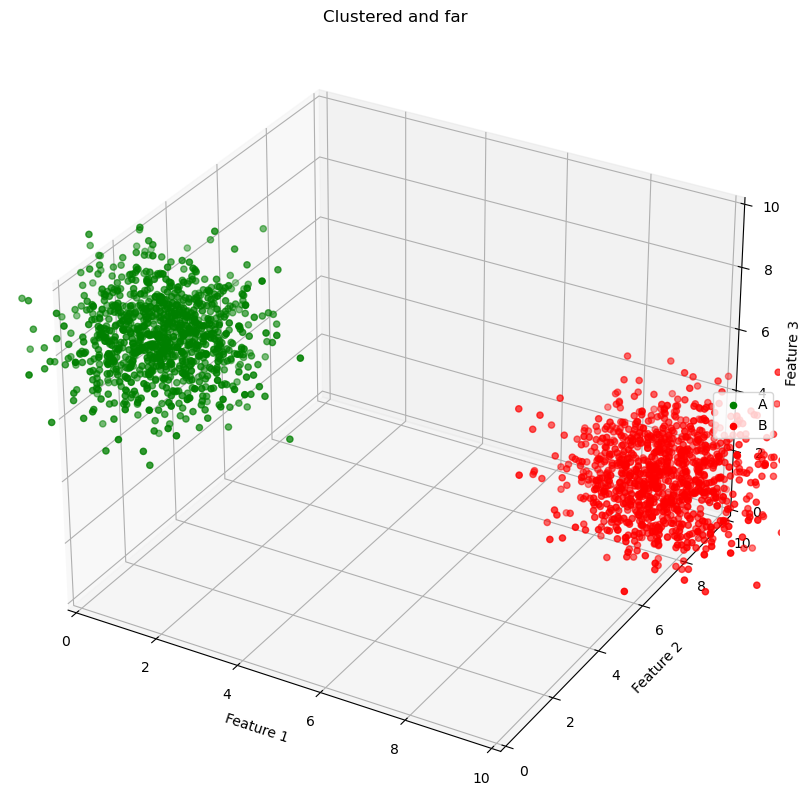

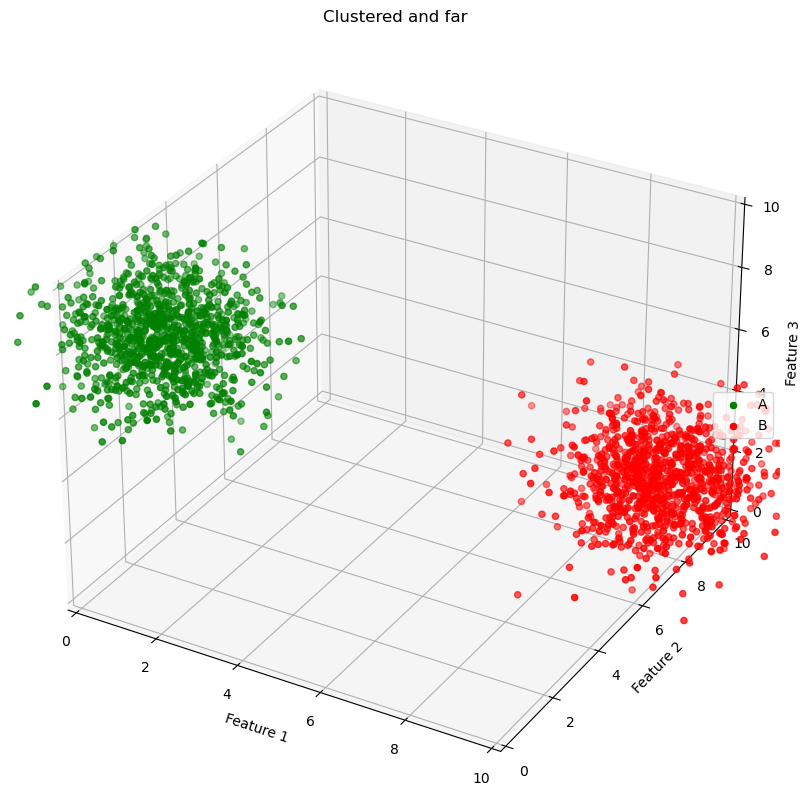

In [6]:
cat1_4 = generate_point(-1,5,5,1,1,1,1000) 
cat2_4 = generate_point(11, 5, 5, 1, 1, 1, 1000)

# Remove overlap 
for i, x in enumerate(cat1_4[0]):
    if x >= 5:
        cat1_4[0][i] = np.random.uniform(0, 5)
for i, x in enumerate(cat2_4[0]):
    if x <= 5:
        cat2_4[0][i] = np.random.uniform(5, 10)

# Save dataset
save(cat1_4, cat2_4, 4)

# Figure
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter3D(cat1_4[0], cat1_4[1], cat1_4[2], color='green', label='A')
ax.scatter3D(cat2_4[0], cat2_4[1], cat2_4[2], color='red', label='B')
ax.legend(loc='right')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_zlim(0, 10)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('Clustered and far')
plt.savefig('../data/figures/clustered-far')
plt.show()

# Varying within-category distance

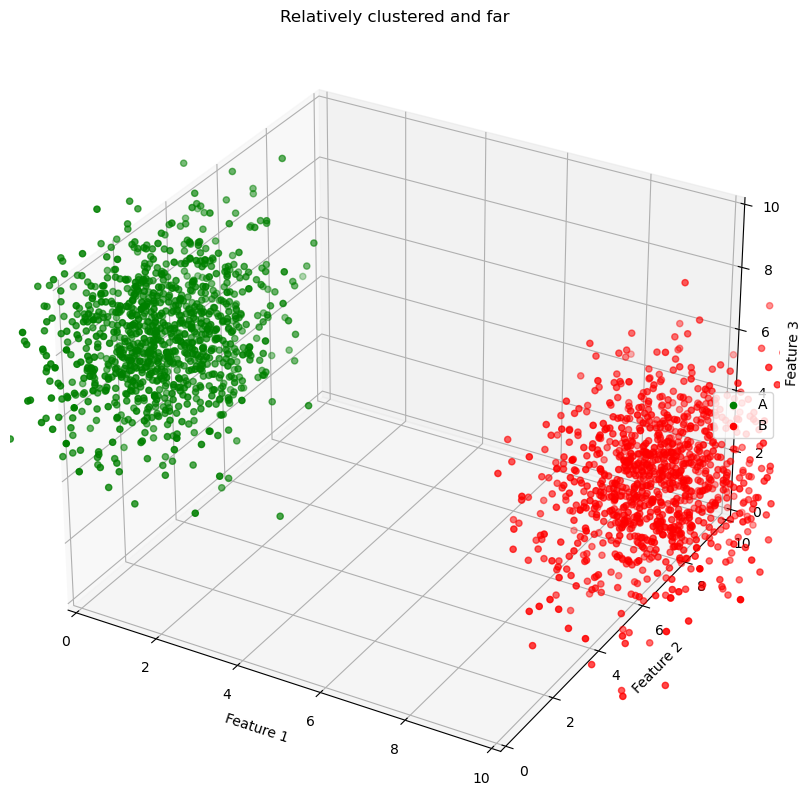

In [176]:
cat1_5 = generate_point(-1,5,5,1,1.5,1.5,1000) 
cat2_5 = generate_point(11, 5, 5, 1, 1.5, 1.5, 1000)

# Remove overlap 
for i, x in enumerate(cat1_5[0]):
    if x >= 5:
        cat1_5[0][i] = np.random.uniform(0, 5)
for i, x in enumerate(cat2_5[0]):
    if x <= 5:
        cat2_5[0][i] = np.random.uniform(5, 10)

# Save dataset
save(cat1_5, cat2_5, 5)

# Figure
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter3D(cat1_5[0], cat1_5[1], cat1_5[2], color='green', label='A')
ax.scatter3D(cat2_5[0], cat2_5[1], cat2_5[2], color='red', label='B')
ax.legend(loc='right')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_zlim(0, 10)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('Relatively clustered and far')
plt.show()

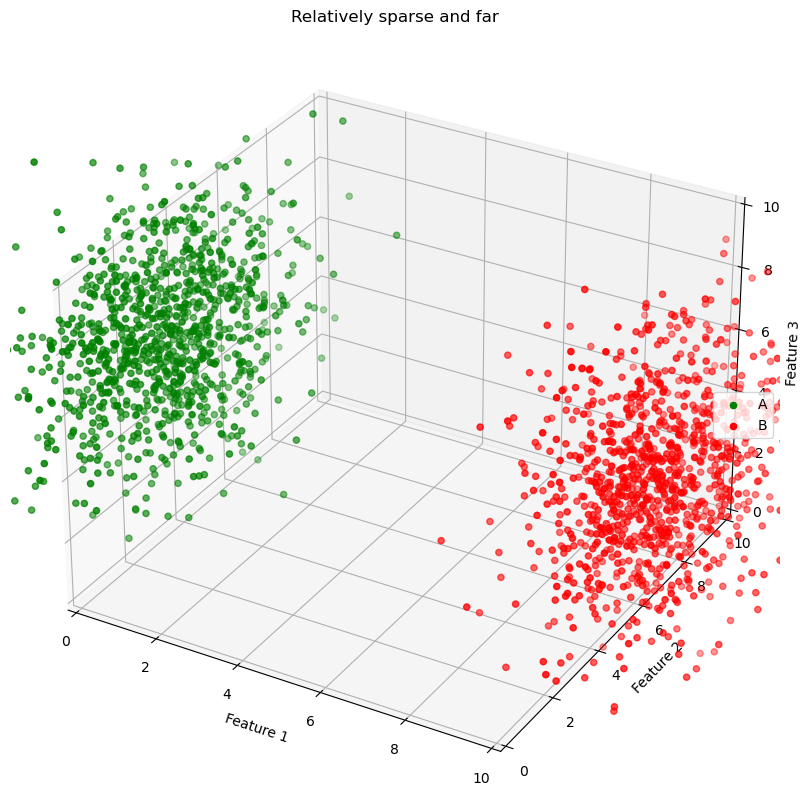

In [177]:
cat1_6 = generate_point(-1,5,5,1,2,2,1000) 
cat2_6 = generate_point(11, 5, 5, 1, 2, 2, 1000)

# Remove overlap 
for i, x in enumerate(cat1_6[0]):
    if x >= 6:
        cat1_6[0][i] = np.random.uniform(0, 5)
for i, x in enumerate(cat2_6[0]):
    if x <= 6:
        cat2_6[0][i] = np.random.uniform(5, 10)

# Save dataset
save(cat1_6, cat2_6, 0)

# Figure
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter3D(cat1_6[0], cat1_6[1], cat1_6[2], color='green', label='A')
ax.scatter3D(cat2_6[0], cat2_6[1], cat2_6[2], color='red', label='B')
ax.legend(loc='right')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_zlim(0, 10)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('Relatively sparse and far')
plt.show()

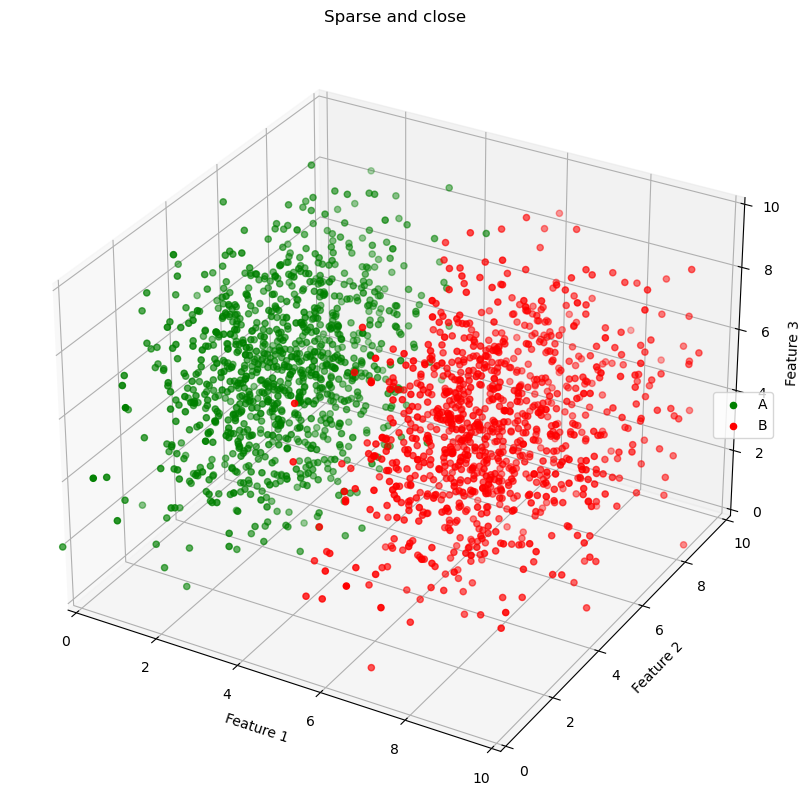

In [8]:
cat1_6 = generate_point(2,5,5,1,2,2,1000) 
cat2_6 = generate_point(6, 5, 5, 1, 2, 2, 1000)

# Remove overlap 
for i, x in enumerate(cat1_6[0]):
    if x >= 6:
        cat1_6[0][i] = np.random.uniform(0, 5)
for i, x in enumerate(cat2_6[0]):
    if x <= 6:
        cat2_6[0][i] = np.random.uniform(5, 10)

# Save dataset
save(cat1_6, cat2_6, 0)

# Figure
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter3D(cat1_6[0], cat1_6[1], cat1_6[2], color='green', label='A')
ax.scatter3D(cat2_6[0], cat2_6[1], cat2_6[2], color='red', label='B')
ax.legend(loc='right')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_zlim(0, 10)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('Sparse and close')
plt.savefig('../data/figures/sparse-close')
plt.show()

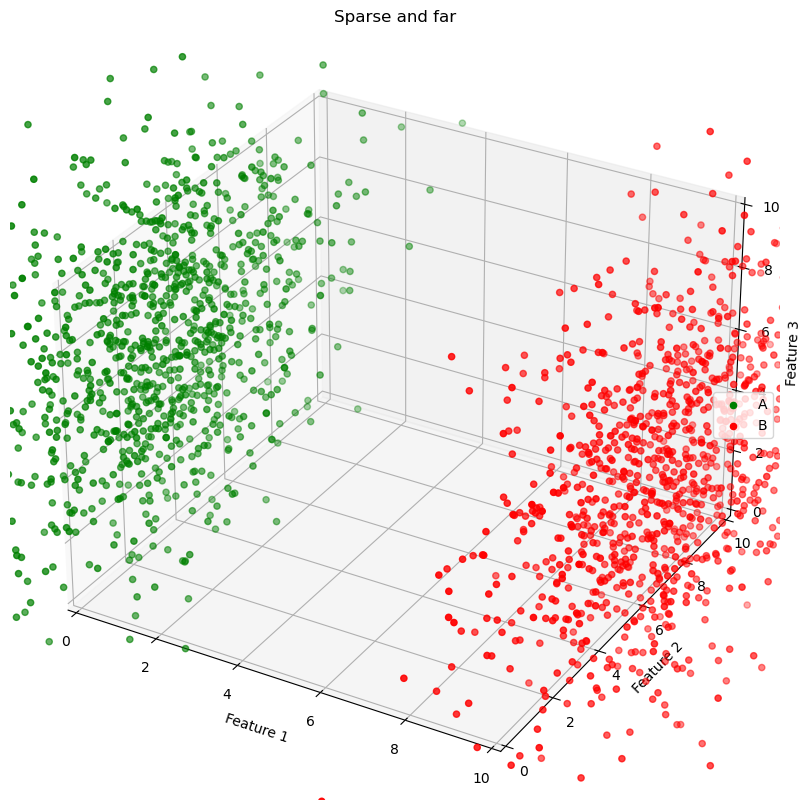

In [178]:
cat1_7 = generate_point(-1,5,5,1,3,3,1000) 
cat2_7 = generate_point(11, 5, 5, 1, 3, 3, 1000)

# Remove overlap 
for i, x in enumerate(cat1_7[0]):
    if x >= 7:
        cat1_7[0][i] = np.random.uniform(0, 5)
for i, x in enumerate(cat2_7[0]):
    if x <= 7:
        cat2_7[0][i] = np.random.uniform(5, 10)

# Save dataset
save(cat1_7, cat2_7, 0)

# Figure
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter3D(cat1_7[0], cat1_7[1], cat1_7[2], color='green', label='A')
ax.scatter3D(cat2_7[0], cat2_7[1], cat2_7[2], color='red', label='B')
ax.legend(loc='right')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_zlim(0, 10)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('Sparse and far')
plt.show()

In [ ]:
# Try 5 dimensional categories

In [52]:
from scipy.spatial.distance import cdist

In [58]:
def compute_sdm(catA, catB):
    # Similarities
    wA = cdist(catA, catA, metric='euclidean')
    wB = cdist(catB, catB, metric='euclidean')
    b = cdist(catA, catB, metric='euclidean')

    # Make sure diag is zero and verify why behaviour is not as intended
    np.fill_diagonal(wA, 0)
    np.fill_diagonal(wB, 0)

    avg_w = (wA.sum()/(wA.size-len(wA)) + wB.sum()/(wB.size-len(wB)))/2
    avg_b = np.mean(b)

    sdm = avg_w/avg_b

    return avg_w, avg_b, sdm

In [41]:
rng = np.random.default_rng()

In [37]:
dataset = np.load('../data/continuous/exp4/categories2/set_54/dataset_54.npz')

In [38]:
catA = dataset['a']
catB = dataset['b']

In [113]:
catA = rng.multivariate_normal([0,2], [[3,0],[0,0.01]], size=10000)
catB = rng.multivariate_normal([0,-2], [[3,0],[0,0.01]], size=10000)

In [114]:
compute_sdm(catA, catB)

(1.9798340342471903, 4.632595410942372, 0.4273703741904041)

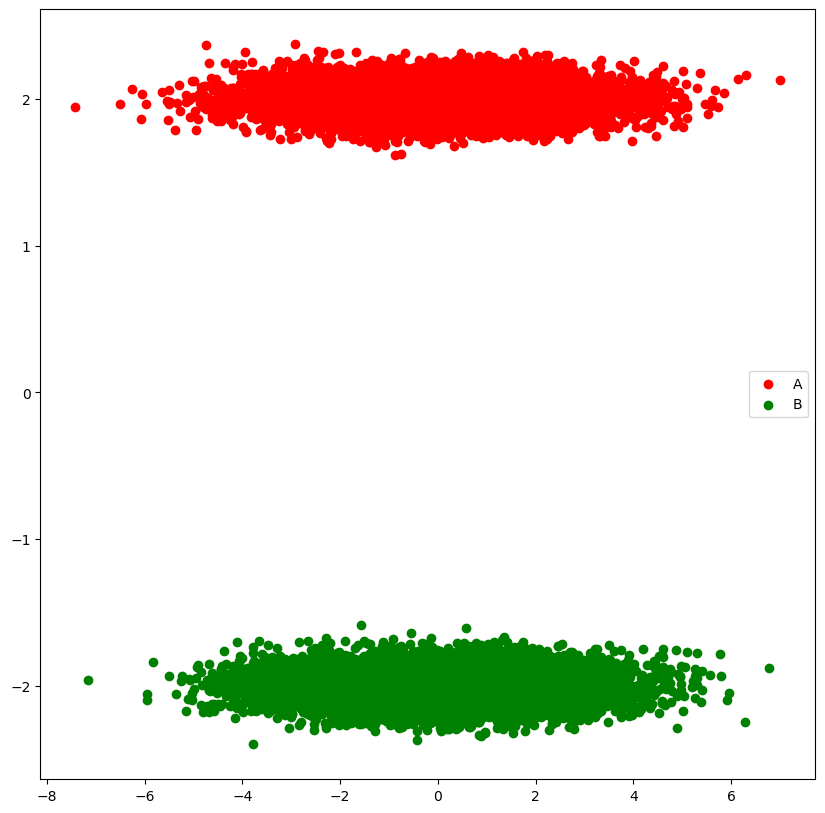

In [115]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
ax.scatter(catA[:,0], catA[:,1], color='red', label='A')
ax.scatter(catB[:,0], catB[:,1], color='green', label='B')
ax.legend(loc='right')
plt.show()